In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2

In [24]:
dx = 0.4  # Шаг дискретизации
dy = 0.4
L = 10 # Расстояние до плоскости Фраунгофера
lambda_ = 0.3# Длина волны излучения

### Двумерное амплитудное распределение объекта

In [25]:
def object_amplitude(x, y):
    a = 1  # Ширина отверстия
    amplitude = np.zeros_like(x)
    amplitude[(np.abs(x) < a/2) & (np.abs(y) < a/2)] = 1

    return amplitude

### Проведение дополнительных рассчётов

In [27]:
# Дискретизация
x = np.arange(-5, 5, dx)
y = np.arange(-5, 5, dy)
X, Y = np.meshgrid(x, y)
amplitude = object_amplitude(X, Y)

# Вычисление преобразования Фурье
F_x = fft2(amplitude)

# Расчет амплитуды в плоскости Фраунгофера
phase_factor = np.exp(1j * np.pi * L / lambda_ * (x**2 + y**2))
F = F_x * phase_factor

# Вычисление интенсивности
intensity = np.abs(F)**2

### Визуализация

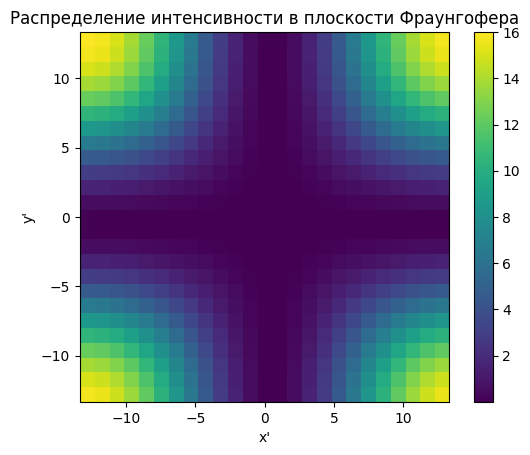

In [29]:
plt.imshow(intensity, extent=[-L/lambda_ * dx, L/lambda_ * dx, -L/lambda_ * dy, L/lambda_ * dy])
plt.colorbar()
plt.title("Распределение интенсивности в плоскости Фраунгофера")
plt.xlabel("x'")
plt.ylabel("y'")
plt.show()